<a href="https://colab.research.google.com/github/snmath-pi/Quant-1-Stock-Price-Prediction-ANN/blob/main/StockPricePredictionANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#importing libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime
import pandas_datareader as pdr
import yfinance as yf
plt.style.use('fivethirtyeight')

from datetime import datetime
yf.pdr_override() # Use yfinance to override pandas_datareader's default data source
symbol = "AAPL"
today = pd.to_datetime("today")  # Ensures today's date
start_date = datetime(2012,1,1)
end_date = today

df = yf.download(symbol, start=start_date, end=end_date) # Use yfinance's download function instead

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416982,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483714,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622309,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754259,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734030,394024400
...,...,...,...,...,...,...
2024-07-09,227.929993,229.399994,226.369995,228.679993,228.679993,48076100
2024-07-10,229.300003,233.080002,229.250000,232.979996,232.979996,62627700
2024-07-11,231.389999,232.389999,225.770004,227.570007,227.570007,64710600


In [10]:
#get the number of rows and columns in the dataset
df.shape

(3152, 6)

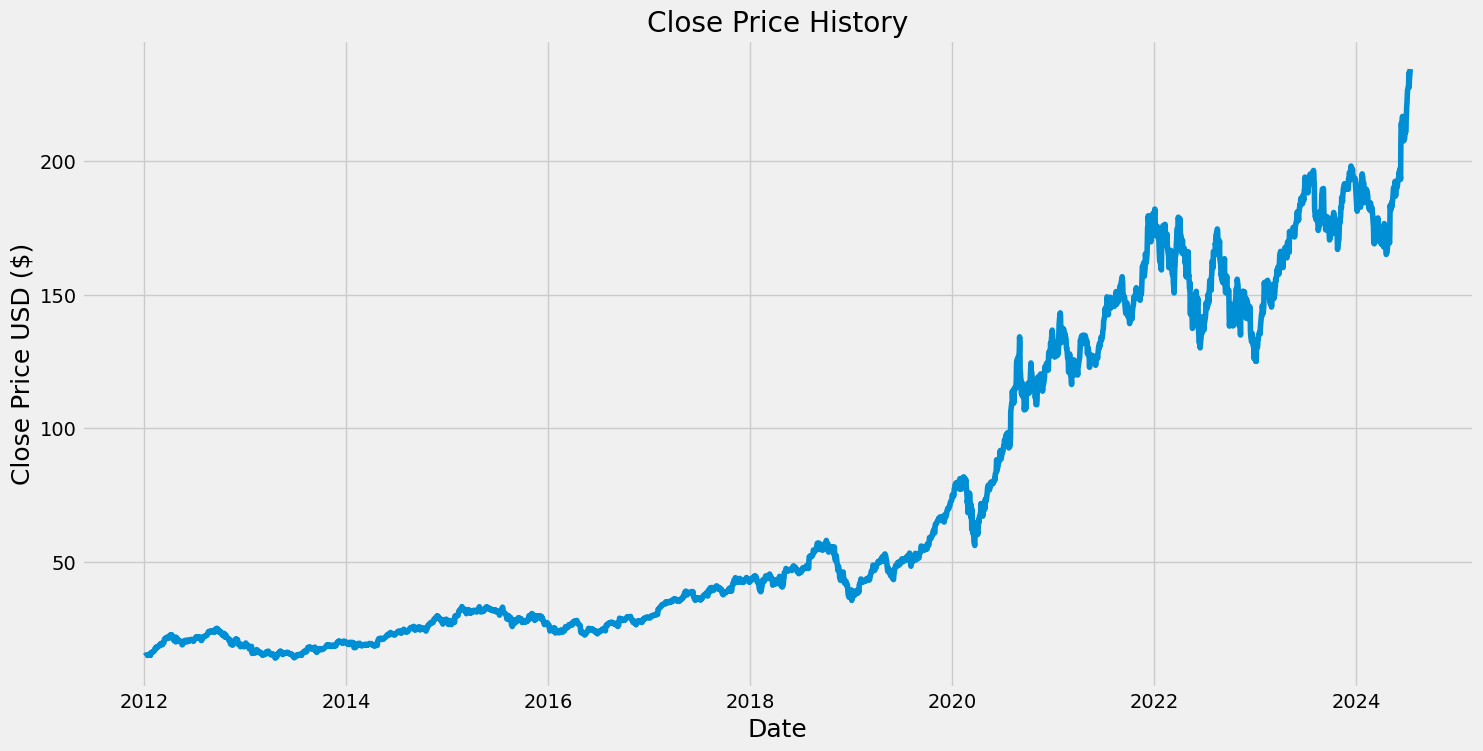

In [11]:
#visualise the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [12]:
#create a new df with only the close column
data = df.filter(['Close'])
#conver the dataframe to a numpy array
dataset = data.values
#get the number of rows to train model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

2522

In [13]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00335349],
       [0.00371152],
       [0.00445512],
       ...,
       [0.96901833],
       [0.98249056],
       [1.        ]])

In [15]:
#create the training data st
#create the trained & scaled data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
      print(x_train)
      print(y_train)
      print()

[array([0.00335349, 0.00371152, 0.00445512, 0.00516308, 0.00505454,
       0.00529916, 0.00518738, 0.00499946, 0.00474349, 0.00553569,
       0.00625013, 0.00602981, 0.00482287, 0.00597472, 0.00484069,
       0.00909331, 0.00876444, 0.00919375, 0.01012204, 0.01068419,
       0.01063721, 0.01046387, 0.01120261, 0.0118976 , 0.01268495,
       0.01395669, 0.01662814, 0.01666864, 0.01815584, 0.01926719,
       0.01735716, 0.01809266, 0.01807808, 0.0201404 , 0.01984716,
       0.02038988, 0.02136514, 0.02190786, 0.02347121, 0.02461009,
       0.02493896, 0.02505399, 0.0231067 , 0.02263688, 0.02270654,
       0.0245372 , 0.02505237, 0.02615886, 0.02876713, 0.03224699,
       0.03159573, 0.03159735, 0.03411328, 0.03490062, 0.03434008,
       0.03382815, 0.03329516, 0.03506586, 0.0362809 , 0.03678959])]
[0.03553243456598516]



In [16]:
#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [17]:
#reshape the x_train dataset
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2462, 60, 1)

In [18]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [20]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
#traing the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2462/2462 [==============================] - 103s 40ms/step - loss: 6.2773e-04


In [23]:
#create testing dataset
#create a new array containing scaled values from id in data range
test_data = scaled_data[training_data_len - 60: , :]
#create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [24]:
#convert data to numpy array
x_test = np.array(x_test)

In [25]:
#reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [26]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 [==============================] - 2s 23ms/step


In [27]:
#get the root mse
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

10.155766533187654

<ipython-input-30-c32f8bc59c16>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


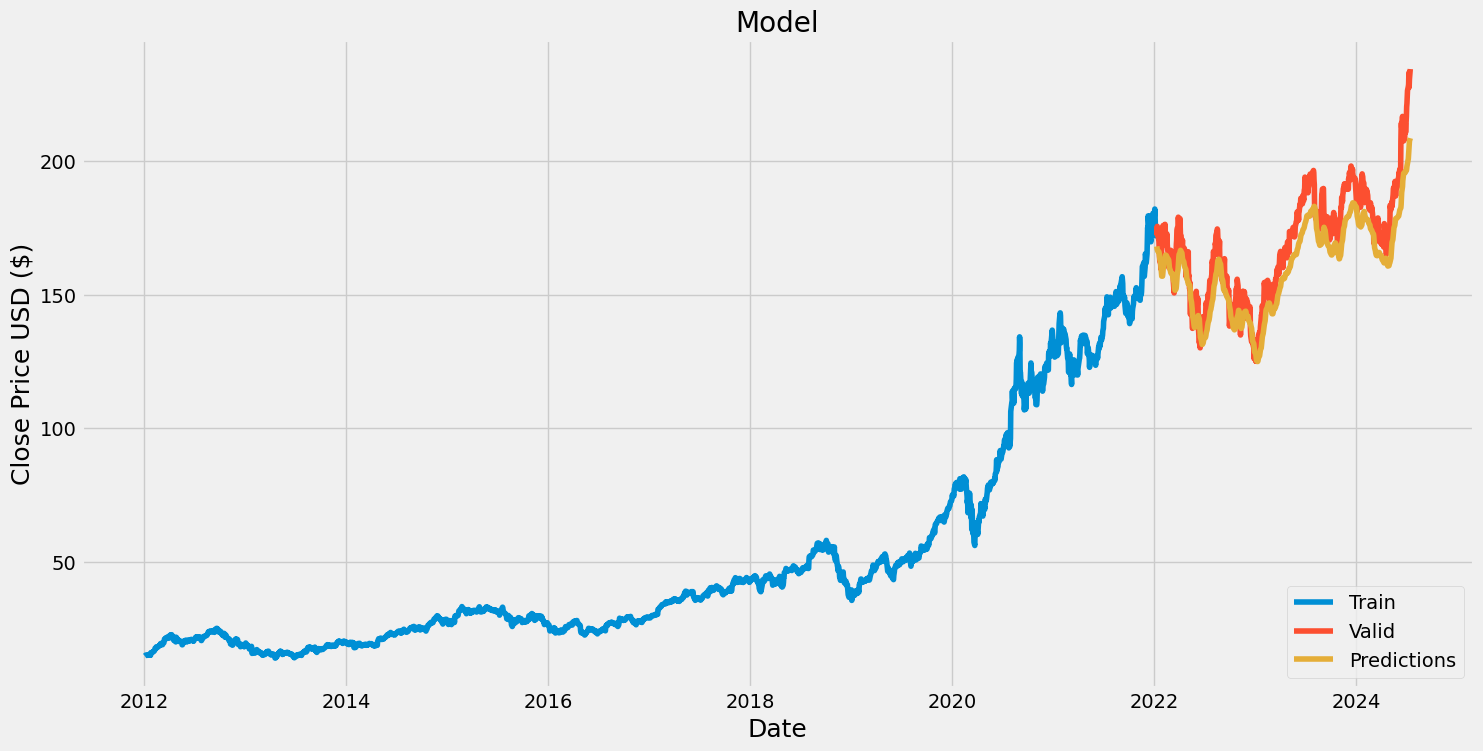

In [30]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [31]:
valid

,Close,Predictions
Date,,
2022-01-10,172.190002,168.028900
2022-01-11,175.080002,167.262100
2022-01-12,175.529999,166.804993
2022-01-13,172.190002,166.586395
2022-01-14,173.070007,166.234467
...,...,...
2024-07-09,228.679993,202.583267
2024-07-10,232.979996,204.280304
2024-07-11,227.570007,206.137665
